# Import Libraries

In [32]:
import os
import os.path
from os import walk
from statistics import mean,stdev
import sys
from utils import *
from variables import *
from math import sqrt
import matplotlib.pyplot as plt

# Functions

In [33]:
def getDeltaRList(current_listR, reference_listR, fraction):
    # current_listR and reference_listR are supposed to be already in percentages
    deltaR = []
    x = range(len(fraction)) # go through the 50 values
    for n in x:
        current_method_value = current_listR[n]
        ref_value = reference_listR[n]
        val = (current_method_value - ref_value)
        deltaR.append(val)
    return deltaR

In [34]:
def getDeltaRStdvList(current_listRStdv, reference_listRStdv, fraction):
    # current_listR and reference_listR are supposed to be already in percentages
    deltaR_stdv = []
    maxy = len(fraction)
    x = range(len(fraction))
    for n in x:
        current_method_value = current_listRStdv[n]
        ref_value = reference_listRStdv[n]
        val = current_method_value - ref_value
        val = sqrt(((current_method_value**2)/maxy) + ((ref_value**2)/maxy))
        deltaR_stdv.append(val)
    return deltaR_stdv

In [35]:
def plotDeltaRGraph(visualizationsPath,currentPath,network,s):
    # Create a figure with customized size
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)

    # Set the axis lables
    ax.set_xlabel('Fraction initially infected (%)', fontsize = 18)
    ax.set_ylabel('ΔR (%)', fontsize = 18)

    xaxis = fractions

    # Line style for each dataset
    lineStyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}

    # Create an error bar for each dataset
    i = 1
    for centrality,color in zip(colors.keys(),colors.values()):
        if(centrality!='degree'):
            globals()[f'line_{i}'] = ax.errorbar(xaxis, globals()[f'deltaR_original_vs_{centrality}'], yerr=globals()[f'deltaRStdv_original_vs_{centrality}'],**lineStyle, color=color, label=f'{centrality}')
            i = i+1

    ax.margins(x=0)

    lines = []

    for x in range(i-1):
        lines.append(globals()[f'line_{x+1}']) 


    plt.legend(handles=lines,  bbox_to_anchor=(1.2, 1))

    # Customize the tickes on the graph
    plt.xticks(xaxis)               
    plt.xticks(rotation = 45) 
    plt.title(f'{network} -- {s}')
    ax.set_ylim([-10,30])
    ax.axhline(0, color = 'black', linewidth=1)

    # Draw a grid for the graph
    ax.grid(color='lightgrey', linestyle='-')
    ax.set_facecolor('w')
    plt.tick_params(labelsize=13)

    plt.savefig(f'{currentPath}/visualization.png',dpi=300, bbox_inches='tight')
    plt.savefig(f'{visualizationsPath}/{network}-{s}.png',dpi=300, bbox_inches='tight')

In [36]:
def plotOutbreakGraph(visualizationsPath,currentPath,network,s):
    # Create a figure with customized size
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)

    # Set the axis lables
    ax.set_xlabel('Fraction initially infected (%)', fontsize = 18)
    ax.set_ylabel('Activation Size', fontsize = 18)

    xaxis = fractions

    # Line style for each dataset
    lineStyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}

    # Create an error bar for each dataset
    i = 1
    for centrality,color in zip(colors.keys(),colors.values()):
        if(centrality!='degree'):
            if(globals()['flag']==0):
                globals()[f'line_{i}'] = ax.errorbar(xaxis, globals()[f'{centrality}_average_each_simulation_list_percentages'], yerr=None,**lineStyle, color=color, label=f'{centrality}')
                i = i+1
            else:
                globals()[f'line_{i}'] = ax.errorbar(xaxis, globals()[f'{centrality}_average_each_simulation_list_percentages'], yerr=globals()[f'{centrality}_standard_each_simulation_list_percentages'],**lineStyle, color=color, label=f'{centrality}')
                i = i+1

    ax.margins(x=0)

    lines = []

    for x in range(i-1):
        lines.append(globals()[f'line_{x+1}']) 


    plt.legend(handles=lines,  bbox_to_anchor=(1.2, 1))

    # Customize the tickes on the graph
    plt.xticks(xaxis)               
    plt.xticks(rotation = 45) 
    plt.title(f'{network} -- {s}')
    ax.set_ylim([0,1])
    ax.axhline(0, color = 'black', linewidth=1)

    # Draw a grid for the graph
    ax.grid(color='lightgrey', linestyle='-')
    ax.set_facecolor('w')
    plt.tick_params(labelsize=13)

    plt.savefig(f'{currentPath}/{network}-{s}.png',dpi=300, bbox_inches='tight')
    plt.savefig(f'{visualizationsPath}/{network}-{s}.png',dpi=300, bbox_inches='tight')

In [37]:
def plotTimeeGraph(visualizationsPath,currentPath,network,s):
    
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)

    # Set the axis lables
    ax.set_xlabel('Fraction', fontsize = 18)
    ax.set_ylabel('Average Number of Iterations', fontsize = 18)

    xaxis = [0.01,0.1,0.2,0.3,0.4,0.5]
    

    

    


    i=1
    # Line style for each dataset
    lineStyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}
    for centrality,color in zip(colors.keys(),colors.values()):
        if(centrality!="degree"):
            y=[]
            #errors = []
            for d in xaxis:
                y.append(globals()[f'{centrality}_averageIterations_each_simulation'].get(d))
                #errors.append(globals()[f'{centrality}_standardIterations_each_simulation'].get(d))
                #globals()[f'line_{i}'] = ax.errorbar(xaxis, globals()[f'{centrality}_averageIterations_each_simulation_list'], yerr=None,**lineStyle, color=color, label=f'{centrality}')
                #i = i+1
            plt.title(f'{network} -- {s}')
            plt.scatter(xaxis,y,color=color)
            #plt.errorbar(xaxis, y, yerr=errors)
            plt.plot(xaxis,y,color=color)
            i=i+1
            #print(centrality,y)
    
    lines = []

    for x in range(i-1):
        lines.append(globals()[f'line_{x+1}']) 


    plt.legend(handles=lines,  bbox_to_anchor=(1.2, 1))
    plt.savefig(f'{currentPath}/{network}-{s}.png',dpi=300, bbox_inches='tight')
    plt.savefig(f'{visualizationsPath}/{network}-{s}.png',dpi=300, bbox_inches='tight')

In [38]:
def deltaRCode(typo):
    mainPath = f'{diffusionModelsPath}/{typo}'
    models = os.listdir(mainPath)
    for model in models:
        secondaryPath = f'{mainPath}/{model}/Pickle Variables'
        networks = os.listdir(secondaryPath)
        visualizationsPath = f'{mainPath}/{model}/Visualizations'
        for network in networks:
            if(network != '.ipynb_checkpoints'):
                simulations = os.listdir(f'{secondaryPath}/{network}')
                networkSize = load_obj(f'{secondaryPath}/{network}', 'networkSize')
                for s in simulations:
                    if(os.path.isdir(f'{secondaryPath}/{network}/{s}')):
                        files = next(walk(f'{secondaryPath}/{network}/{s}'), (None, None, []))[2]
                        for file in files:
                            if(file.endswith('.png')==False):
                                
                                globals()[f'{file.split(".")[0]}'] = load_obj(f'{secondaryPath}/{network}/{s}', f'{file.split(".")[0]}')
                                globals()[f'{file.split(".")[0]}_list'] = []
                                globals()[f'{file.split(".")[0]}_list_percentages'] = []
                                for i in globals()[f'{file.split(".")[0]}'].values():
                                    globals()[f'{file.split(".")[0]}_list'].append(i)
                                #print(network,globals()[f'{file.split(".")[0]}_list'][0])
                                for i in globals()[f'{file.split(".")[0]}_list']:
                                    globals()[f'{file.split(".")[0]}_list_percentages'].append((i/networkSize)*100)
                        for centrality in colors.keys():
                            if(centrality!='degree'):
                                globals()[f'deltaR_original_vs_{centrality}'] = getDeltaRList( globals()[f'{centrality}_average_each_simulation_list_percentages'], degree_average_each_simulation_list_percentages, fractions)
                                globals()[f'deltaRStdv_original_vs_{centrality}'] = getDeltaRStdvList( globals()[f'{centrality}_standard_each_simulation_list_percentages'], degree_standard_each_simulation_list_percentages, fractions)
                        plotDeltaRGraph(visualizationsPath,f'{secondaryPath}/{network}/{s}',f'{network}',f'{s}')

In [39]:
def activationSizeCode(typo):
    mainPath = f'{diffusionModelsPath}/{typo}'
    
    models = os.listdir(mainPath)
    for model in models:
        secondaryPath = f'{mainPath}/{model}/Pickle Variables'
        networks = os.listdir(secondaryPath)
        visualizationsPath = f'{mainPath}/{model}/Visualizations'
        for network in networks:
            if(network != '.ipynb_checkpoints'):
                simulations = os.listdir(f'{secondaryPath}/{network}')
                networkSize = load_obj(f'{secondaryPath}/{network}', 'networkSize')
                for s in simulations:
                    globals()['flag'] = 0
                    if(os.path.isdir(f'{secondaryPath}/{network}/{s}')):
                        files = next(walk(f'{secondaryPath}/{network}/{s}'), (None, None, []))[2]
                        for file in files:
                            if 'standard' in file:
                                globals()['flag'] = 1
                            if(file.endswith('.png')==False):  
                                globals()[f'{file.split(".")[0]}'] = load_obj(f'{secondaryPath}/{network}/{s}', f'{file.split(".")[0]}')
                                globals()[f'{file.split(".")[0]}_list'] = []
                                globals()[f'{file.split(".")[0]}_list_percentages'] = []
                                for i in globals()[f'{file.split(".")[0]}'].values():
                                    globals()[f'{file.split(".")[0]}_list'].append(i)
                                #print(network,globals()[f'{file.split(".")[0]}_list'][0])
                                for i in globals()[f'{file.split(".")[0]}_list']:
                                    globals()[f'{file.split(".")[0]}_list_percentages'].append((i/networkSize))
                        plotOutbreakGraph(visualizationsPath,f'{secondaryPath}/{network}/{s}',f'{network}',f'{s}')

In [41]:
def TimeCode(typo):
    mainPath = f'{diffusionModelsPath}/{typo}'
    models = os.listdir(mainPath)
    for model in models:
        secondaryPath = f'{mainPath}/{model}/Pickle Variables'
        visualizationsPath = f'{mainPath}/{model}/Visualizations'
        networks = os.listdir(secondaryPath)
        for network in networks:
            if(network != '.ipynb_checkpoints'):
                simulations = os.listdir(f'{secondaryPath}/{network}')
                networkSize = load_obj(f'{secondaryPath}/{network}', 'networkSize')
                for s in simulations:
                    if(os.path.isdir(f'{secondaryPath}/{network}/{s}')):
                        files = next(walk(f'{secondaryPath}/{network}/{s}'), (None, None, []))[2]
                        for file in files:
                            if(file.endswith('.png')==False):  
                                globals()[f'{file.split(".")[0]}'] = load_obj(f'{secondaryPath}/{network}/{s}', f'{file.split(".")[0]}')
                                globals()[f'{file.split(".")[0]}_list'] = []
                                globals()[f'{file.split(".")[0]}_list_percentages'] = []
                                for i in globals()[f'{file.split(".")[0]}'].values():
                                    globals()[f'{file.split(".")[0]}_list'].append(round(i,3))
                                #print(network,globals()[f'{file.split(".")[0]}_list'][0])
                                #for i in globals()[f'{file.split(".")[0]}_list']:
                                    #globals()[f'{file.split(".")[0]}_list_percentages'].append((i/networkSize))
                                for i in globals()[f'{file.split(".")[0]}_list']:
                                    globals()[f'{file.split(".")[0]}_list_percentages'].append((i/networkSize)*100)
                        for centrality in colors.keys():
                            if(centrality!='degree'):
                                globals()[f'deltaR_original_vs_{centrality}'] = getDeltaRList( globals()[f'{centrality}_averageIterations_each_simulation_list_percentages'], degree_averageIterations_each_simulation_list_percentages, fractions)
                                globals()[f'deltaRStdv_original_vs_{centrality}'] = getDeltaRStdvList( globals()[f'{centrality}_standardIterations_each_simulation_list_percentages'], degree_standardIterations_each_simulation_list_percentages, fractions)
                        plotTimeeGraph(visualizationsPath,f'{secondaryPath}/{network}/{s}',f'{network}',f'{s}')
    

# Visualization Code for all Models

C:\Users\Hawraa\AppData\Local\Temp/ipykernel_9156/698914793.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 8))


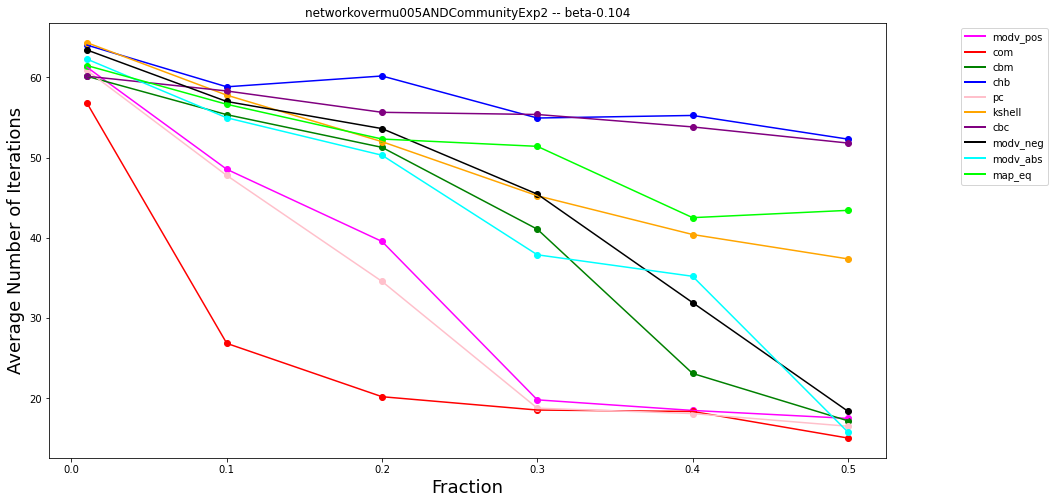

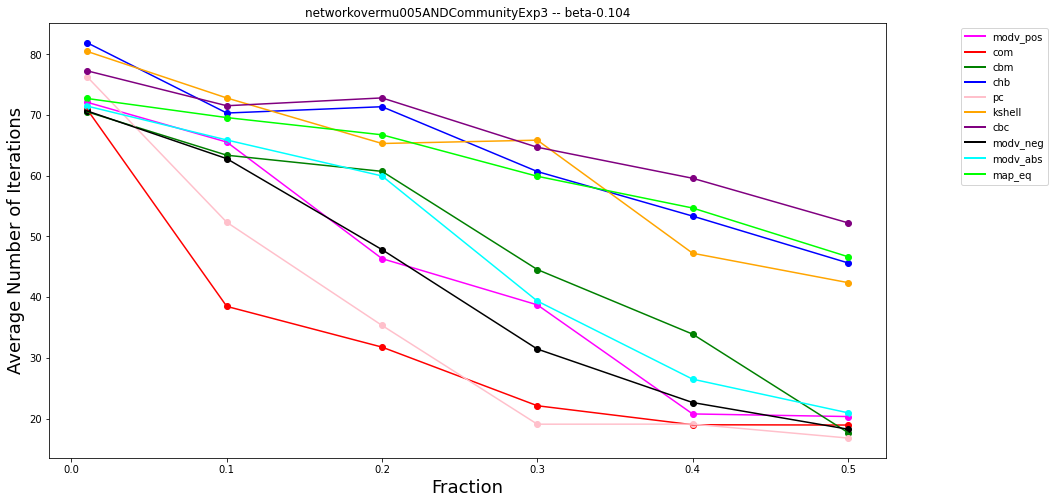

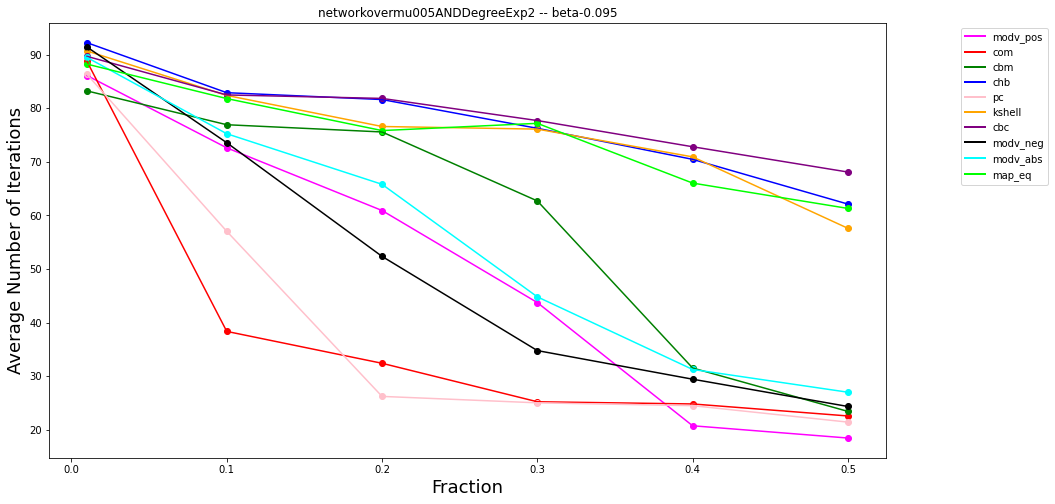

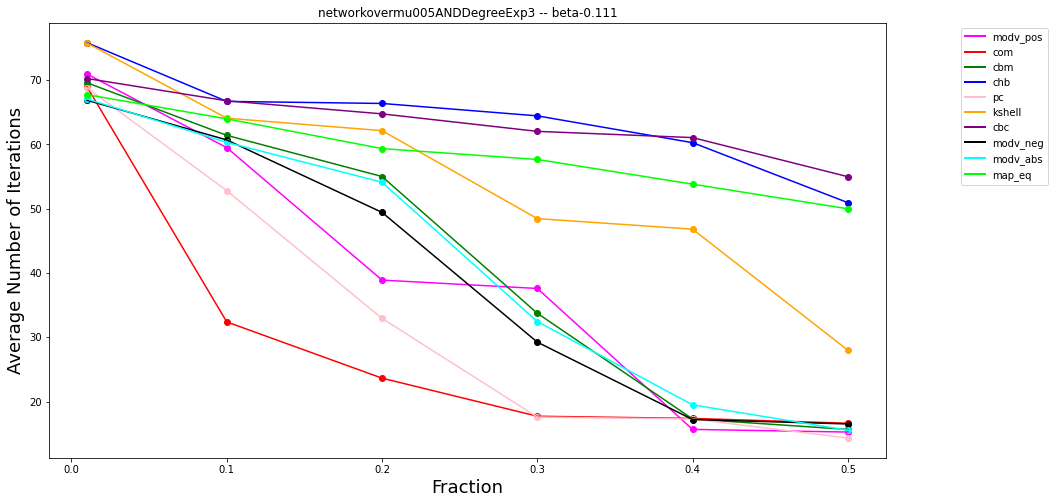

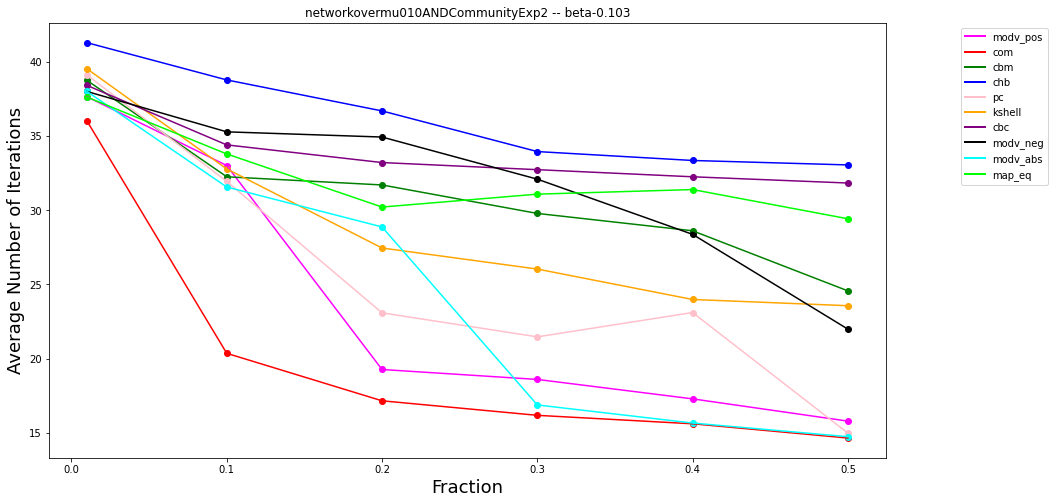

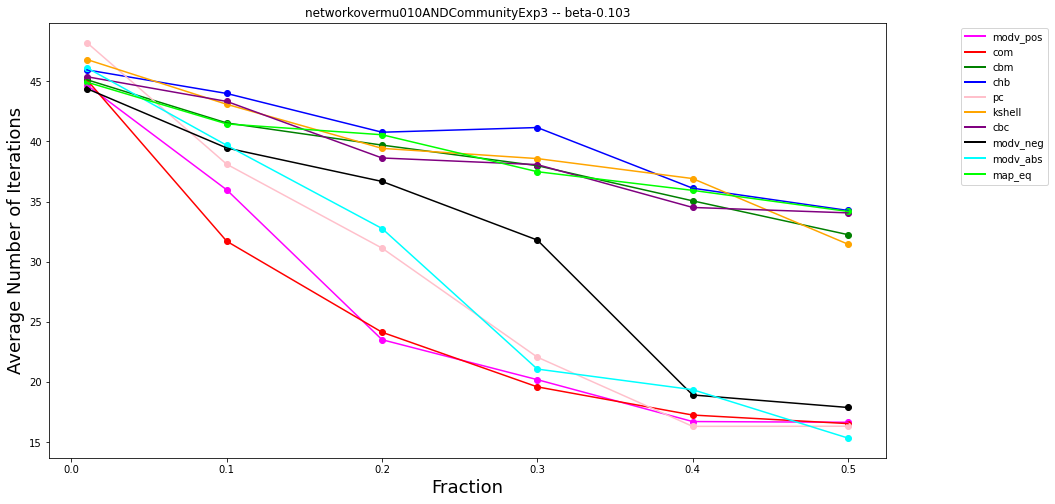

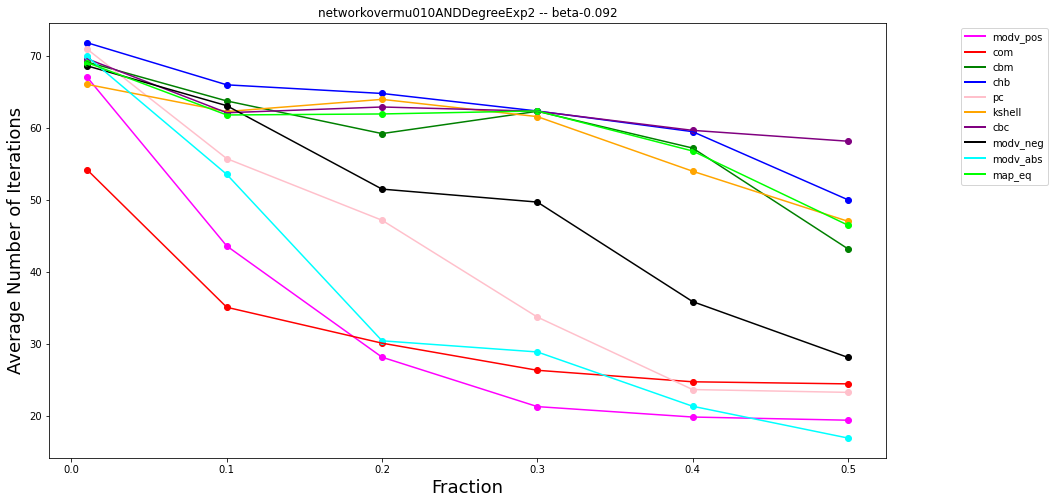

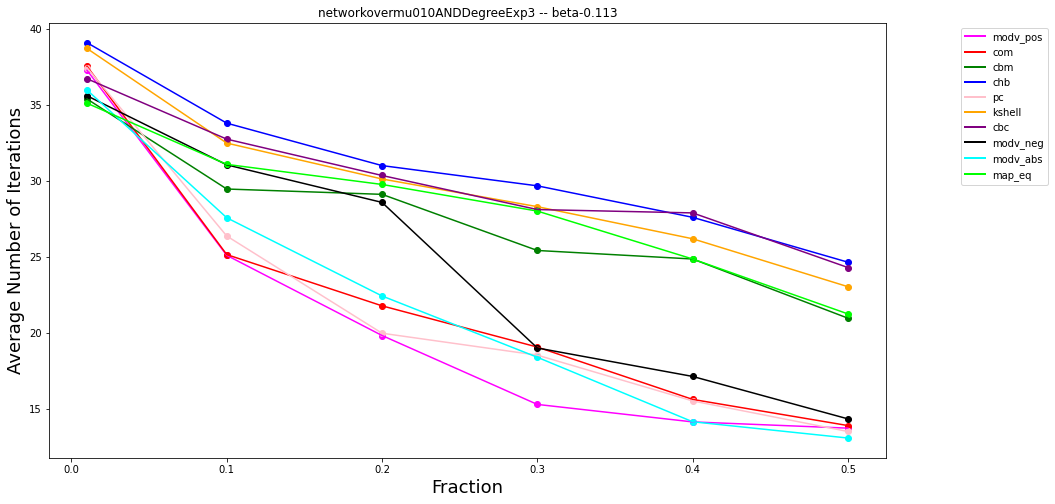

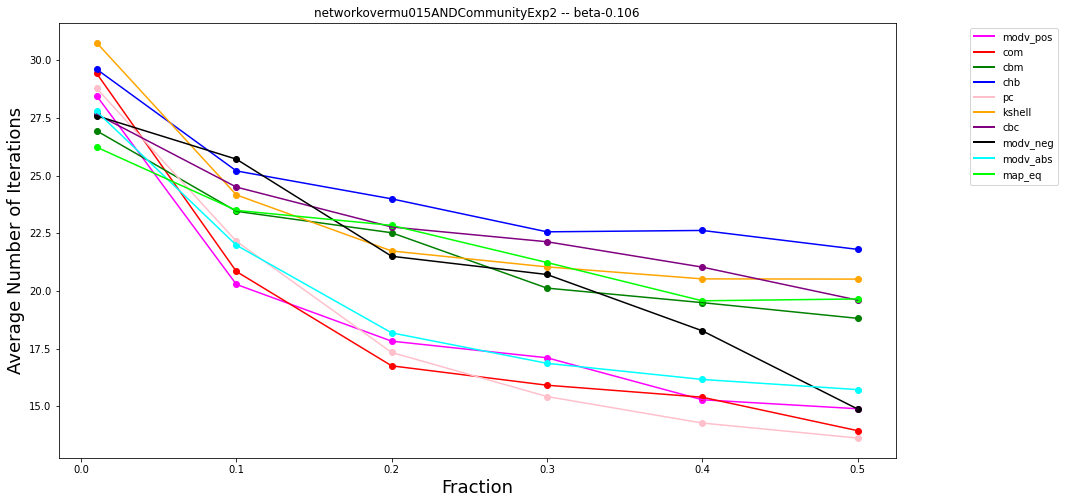

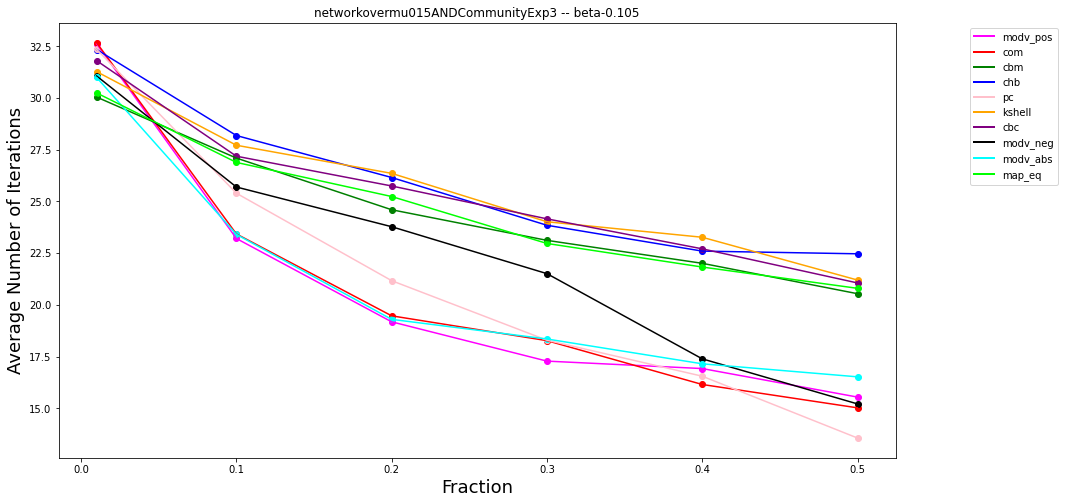

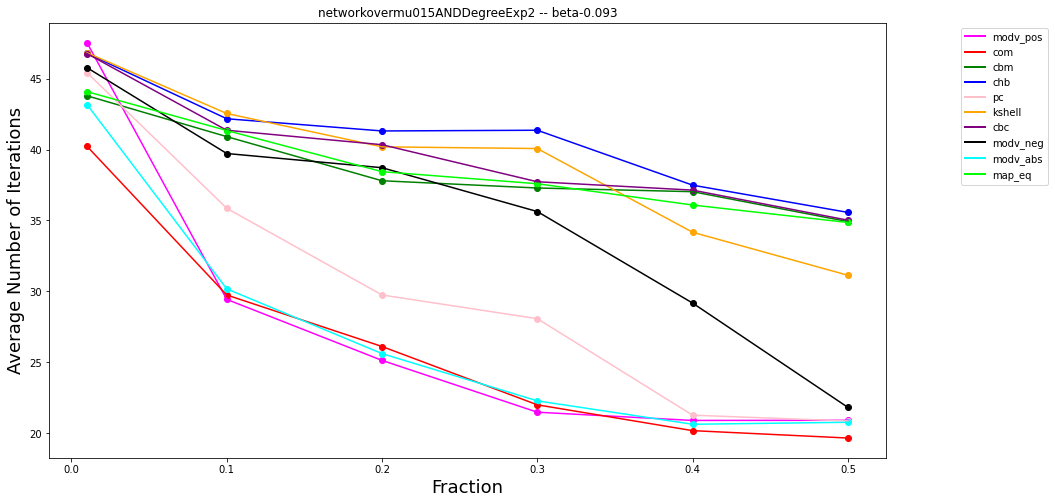

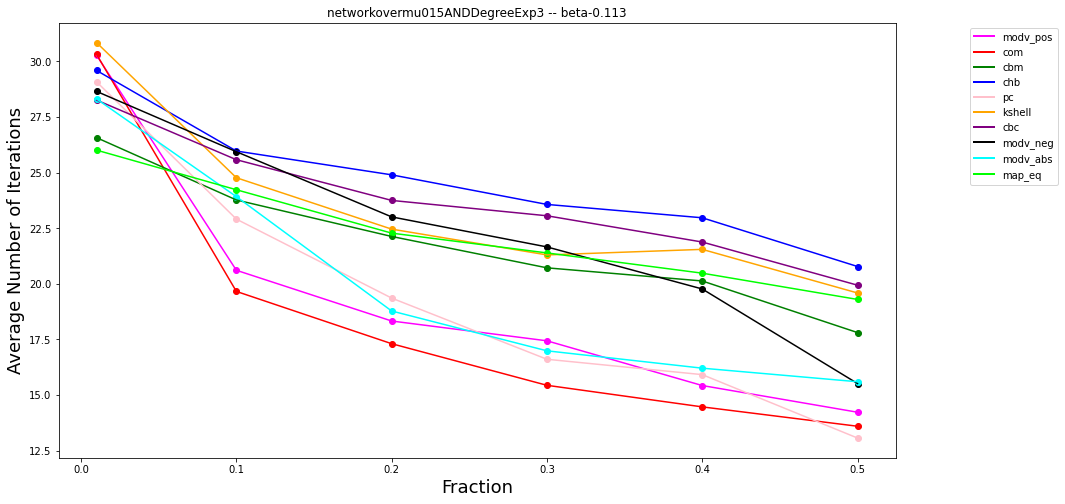

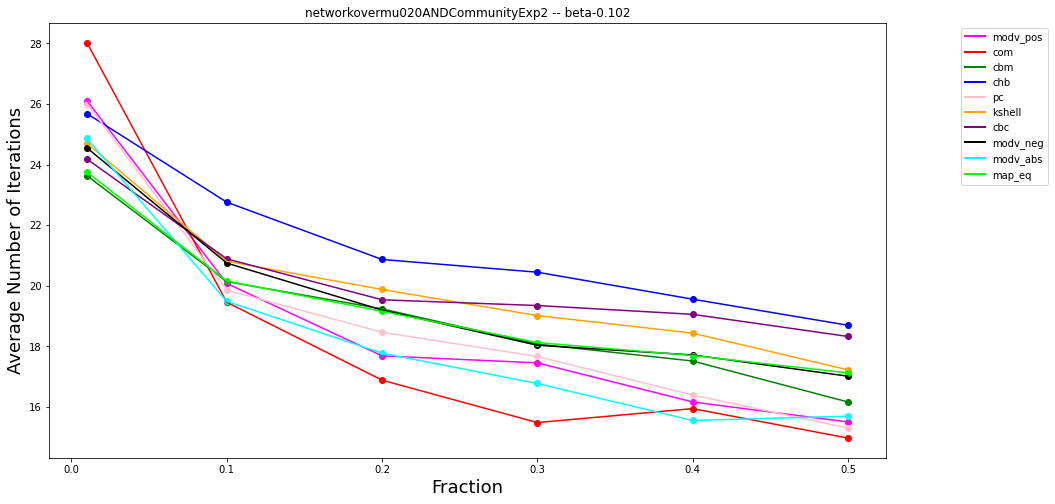

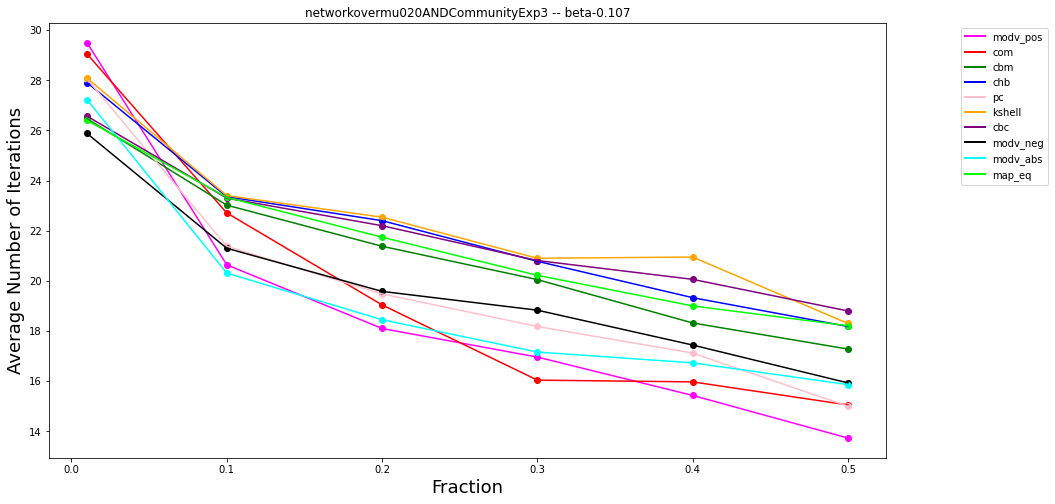

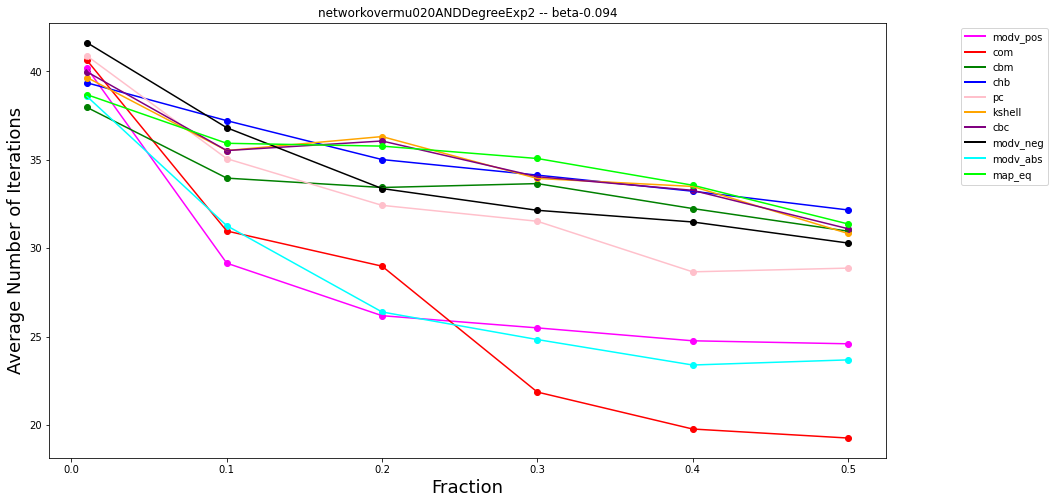

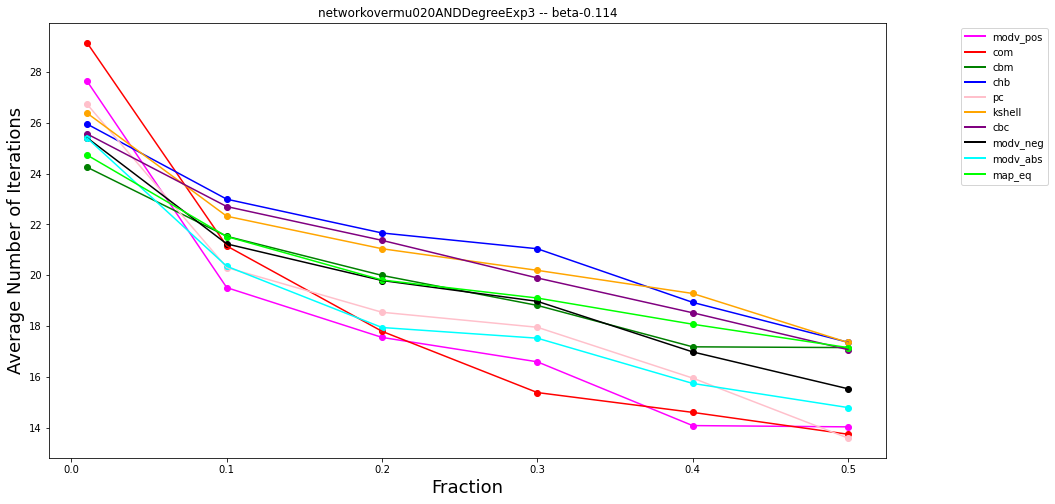

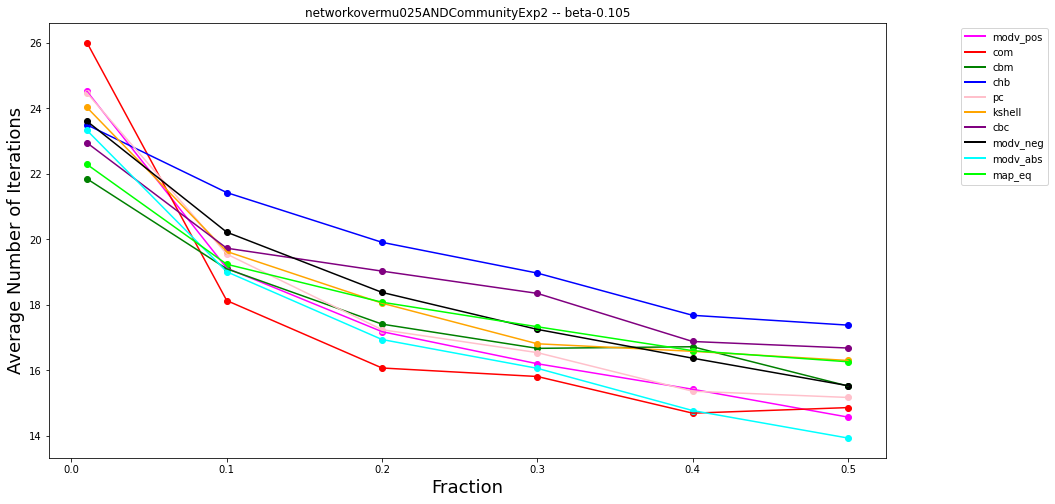

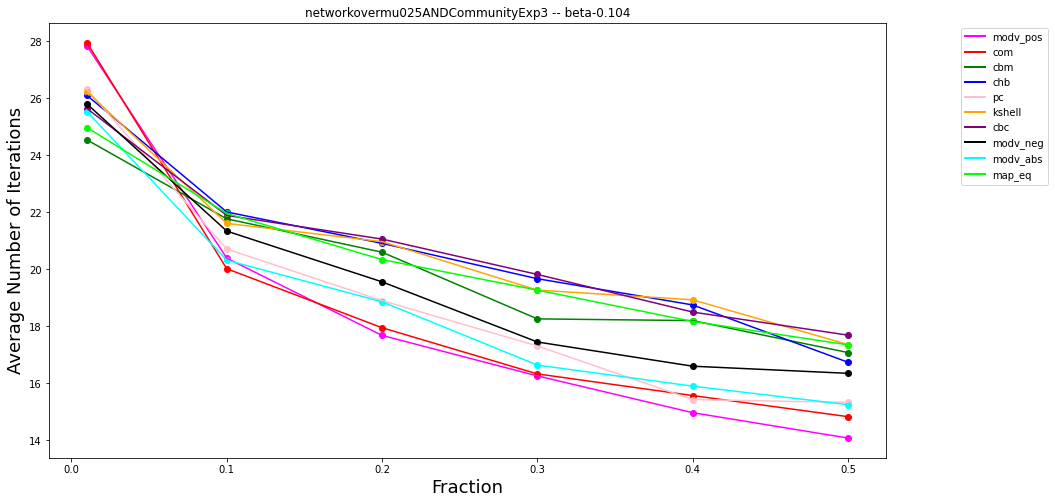

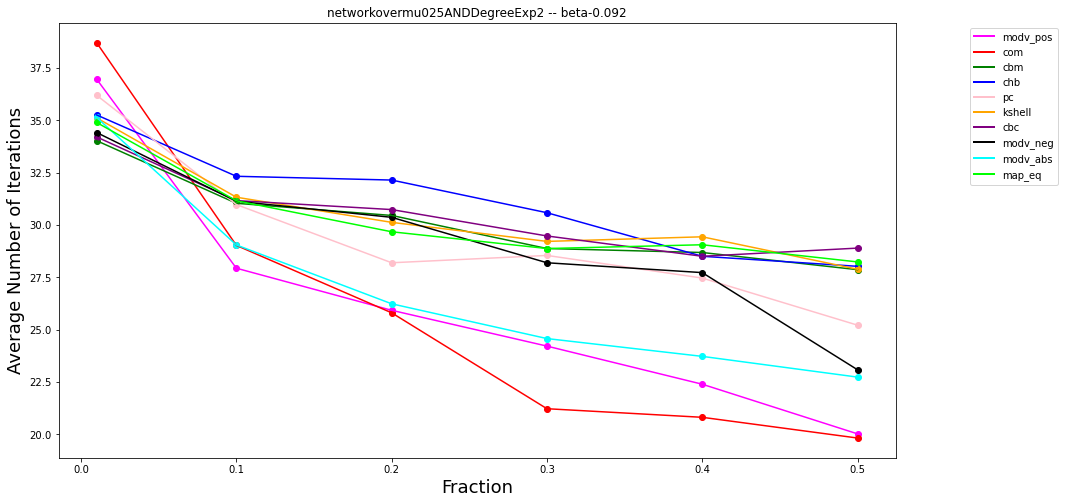

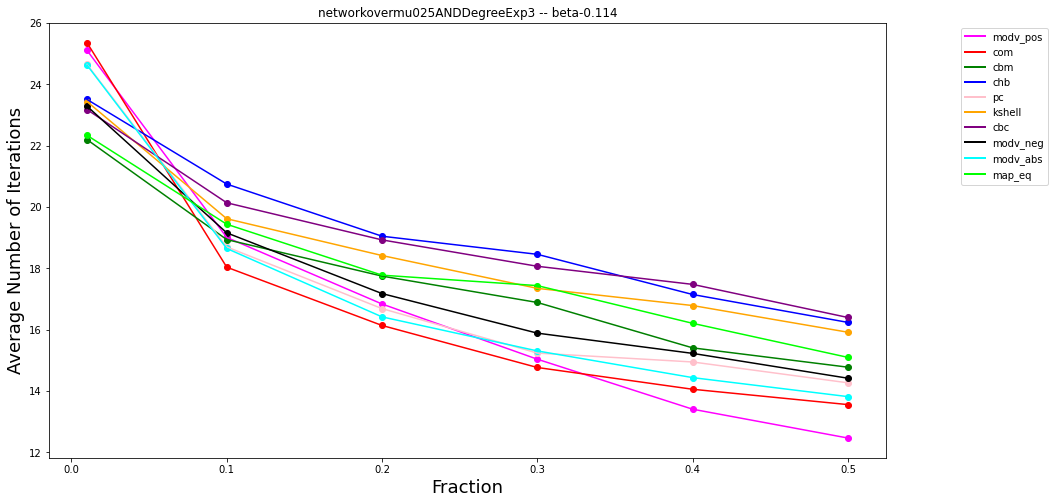

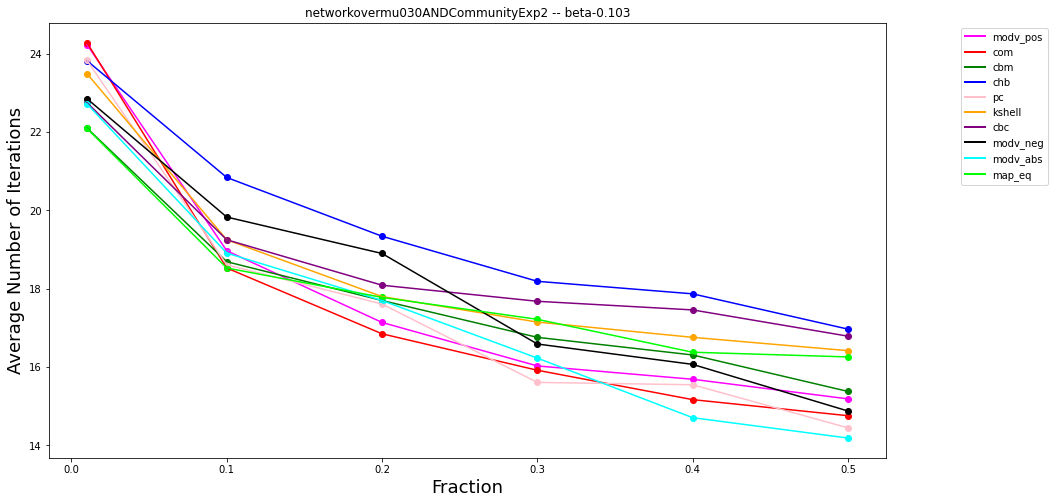

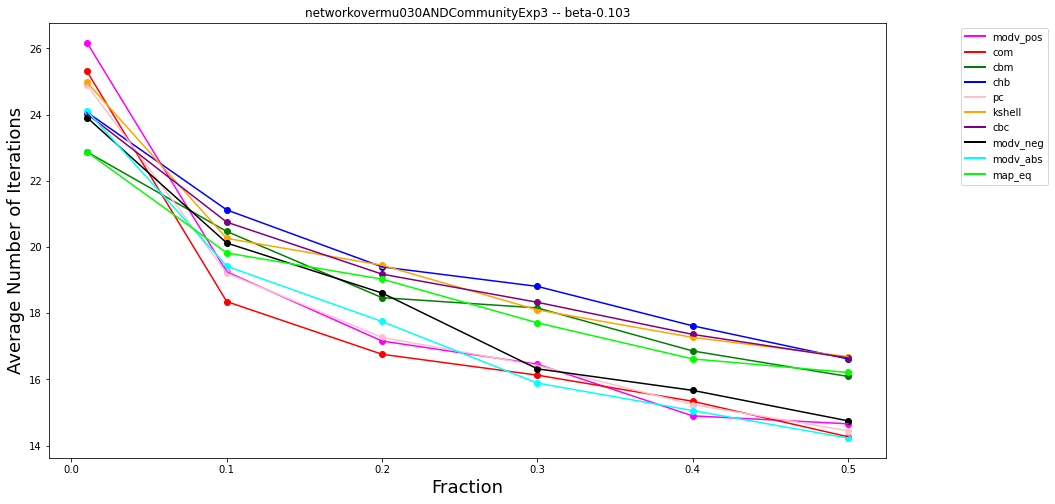

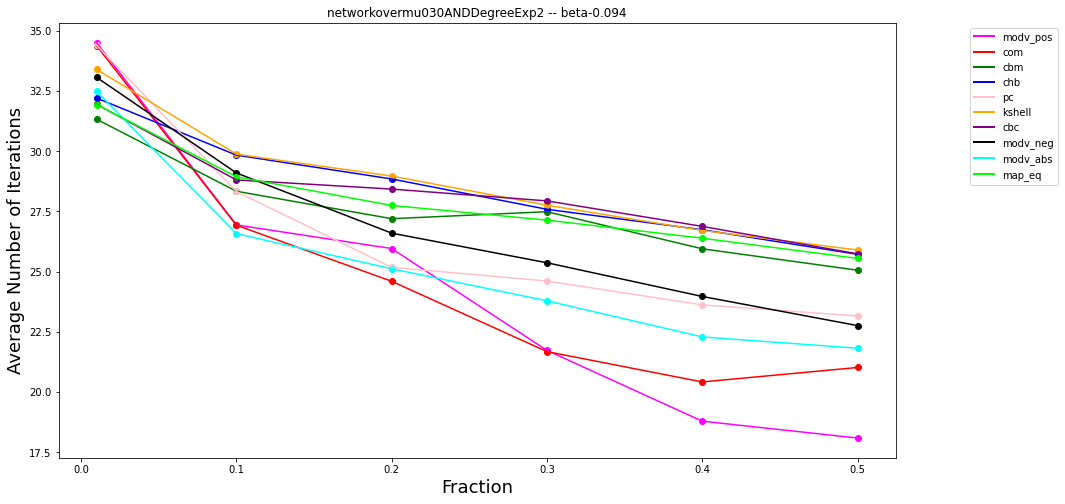

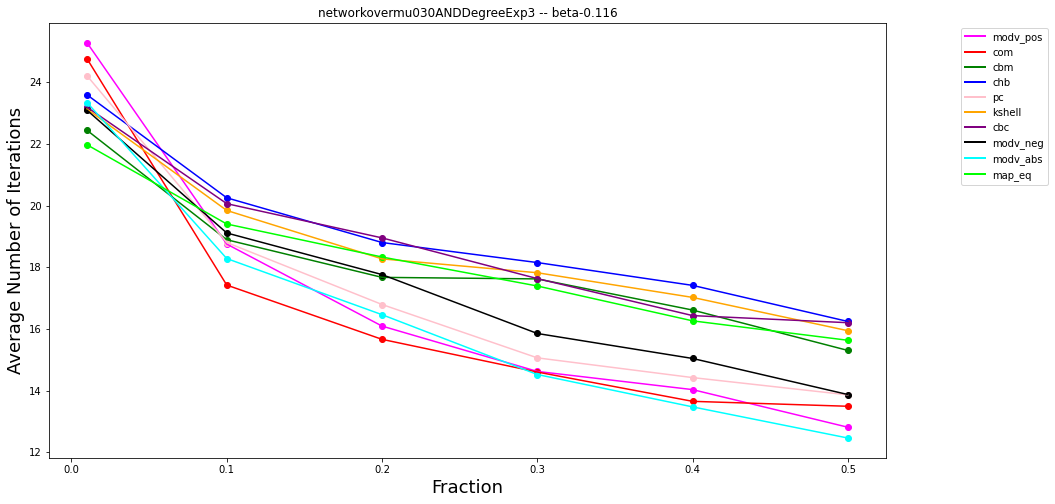

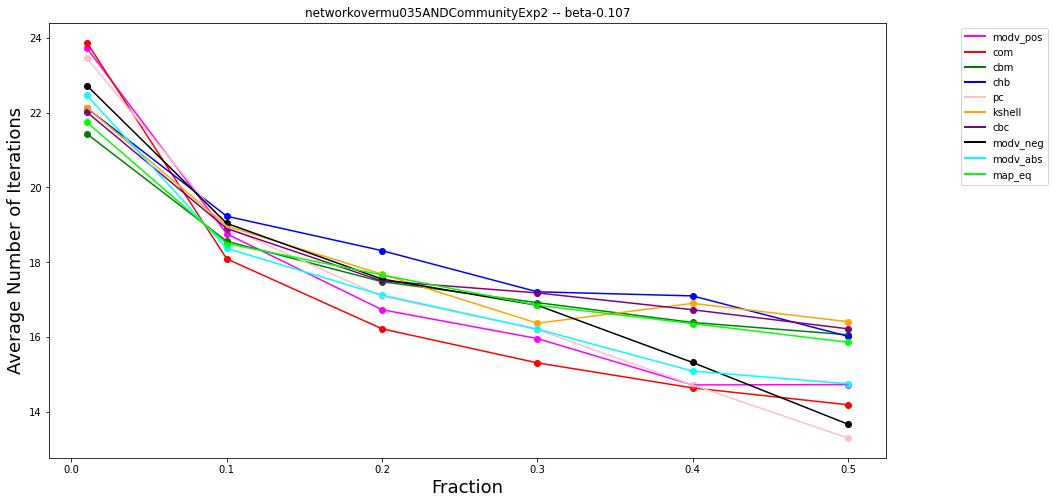

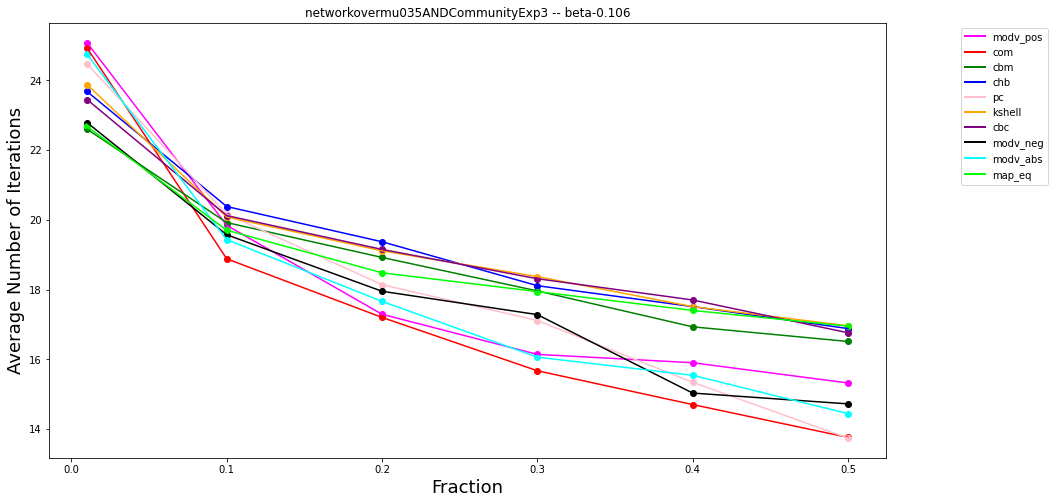

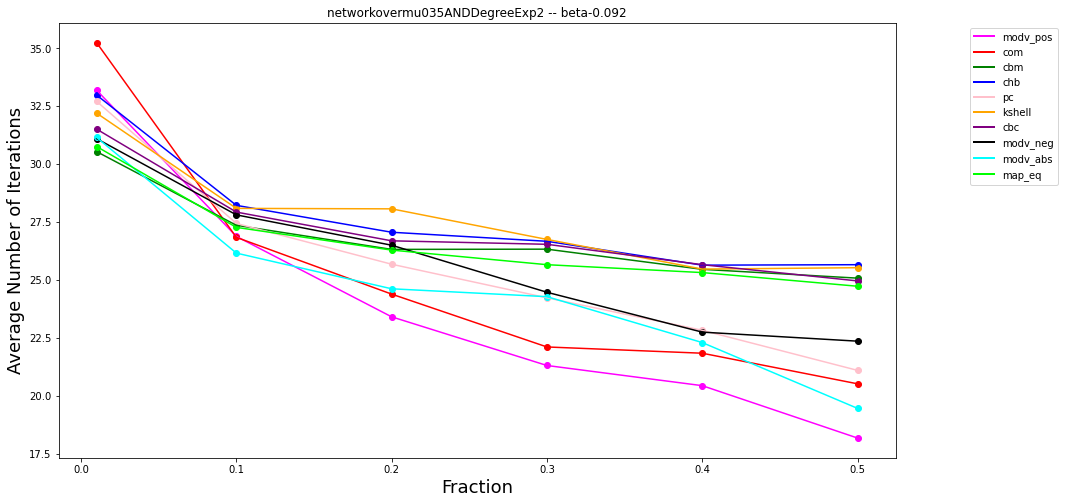

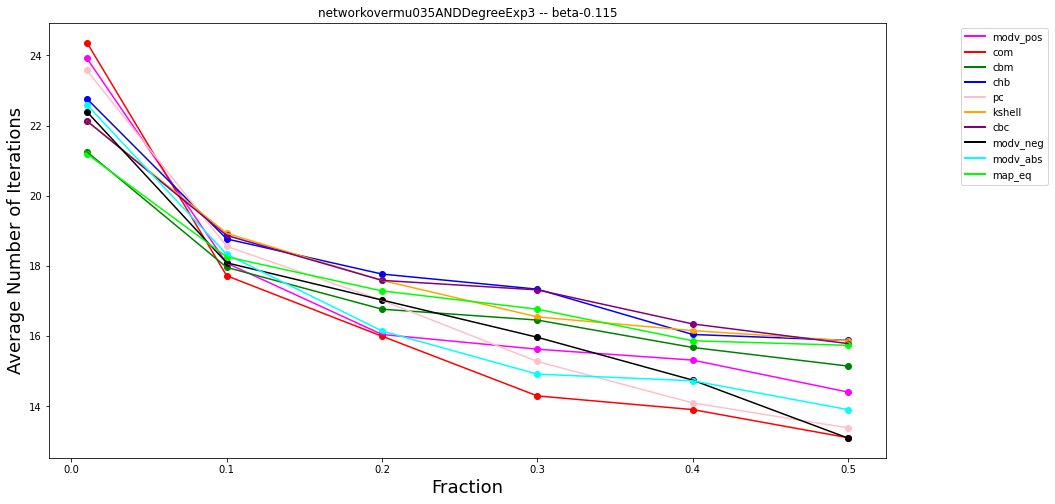

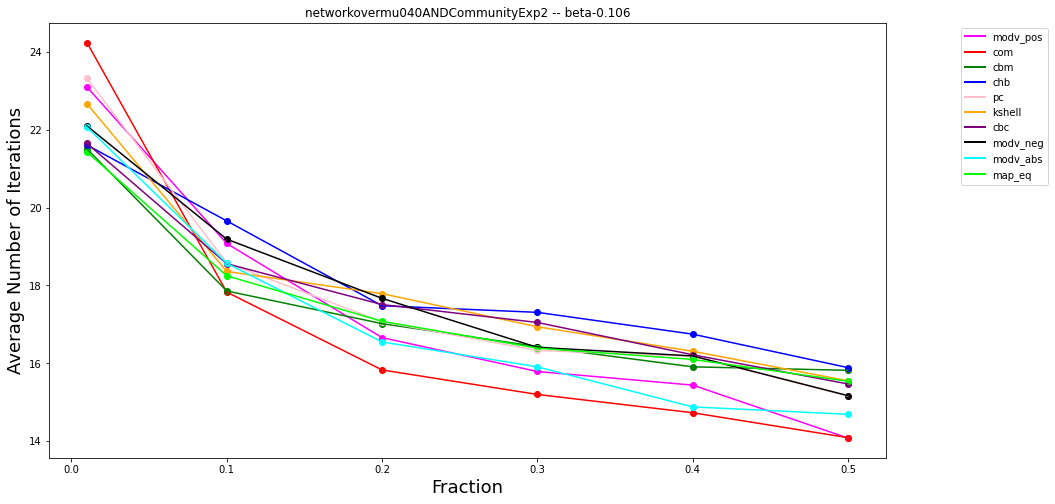

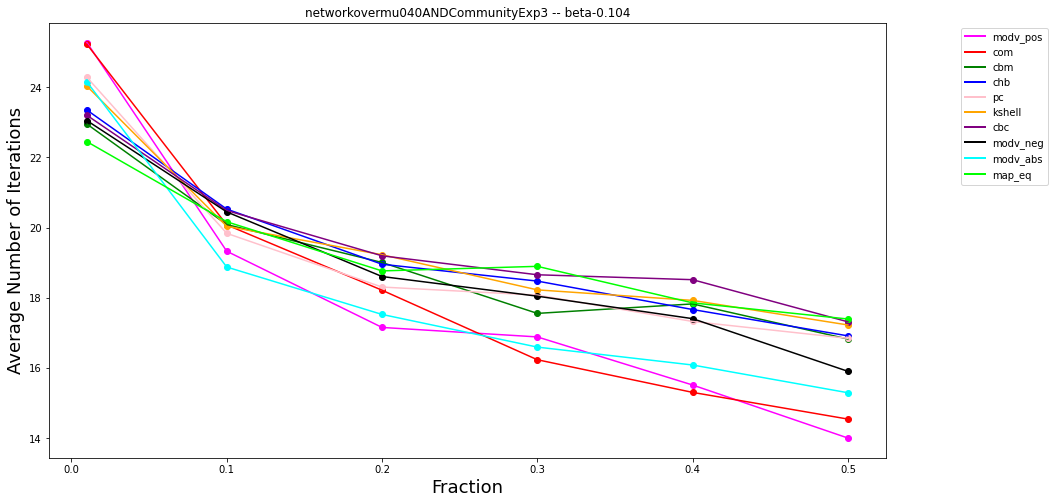

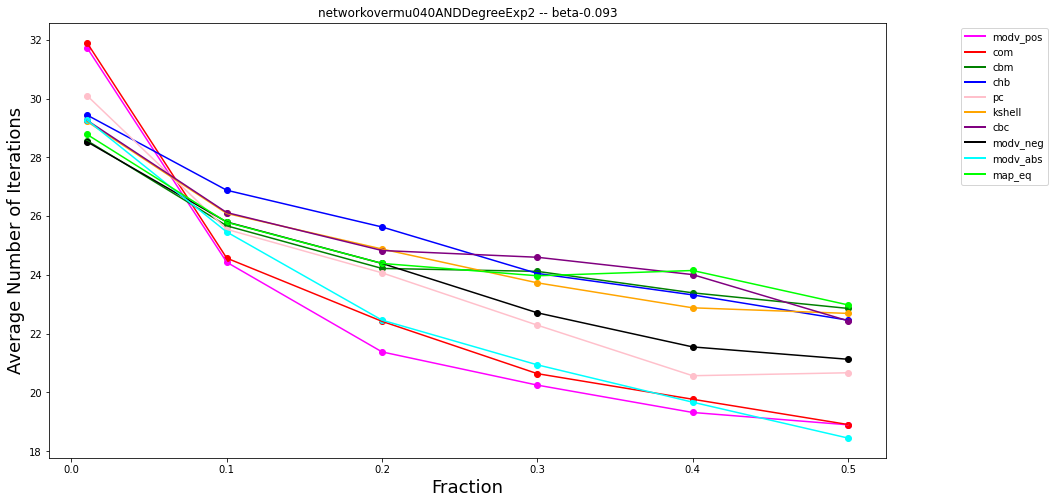

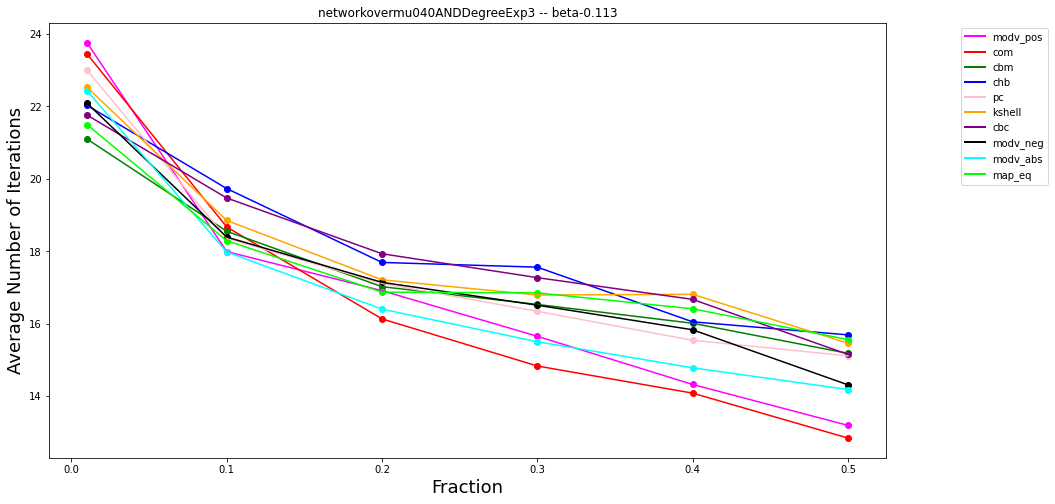

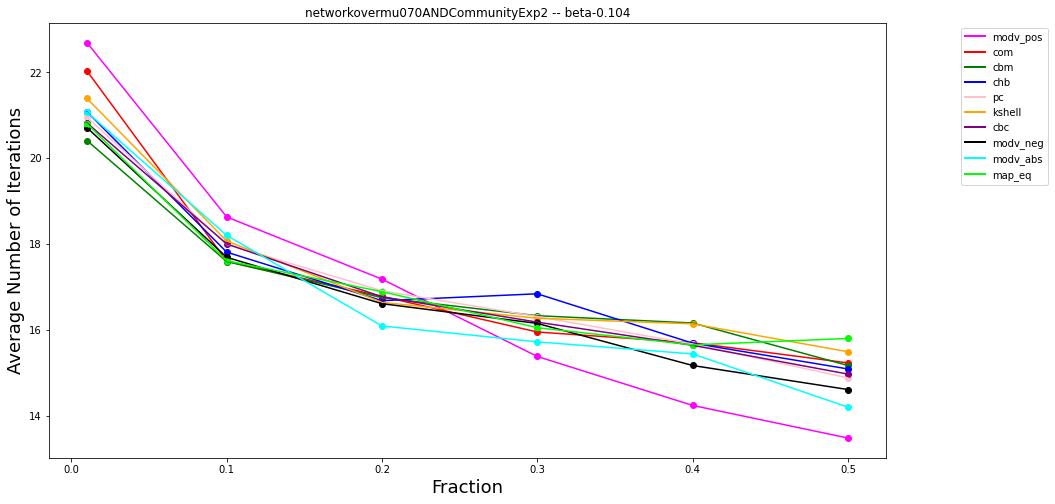

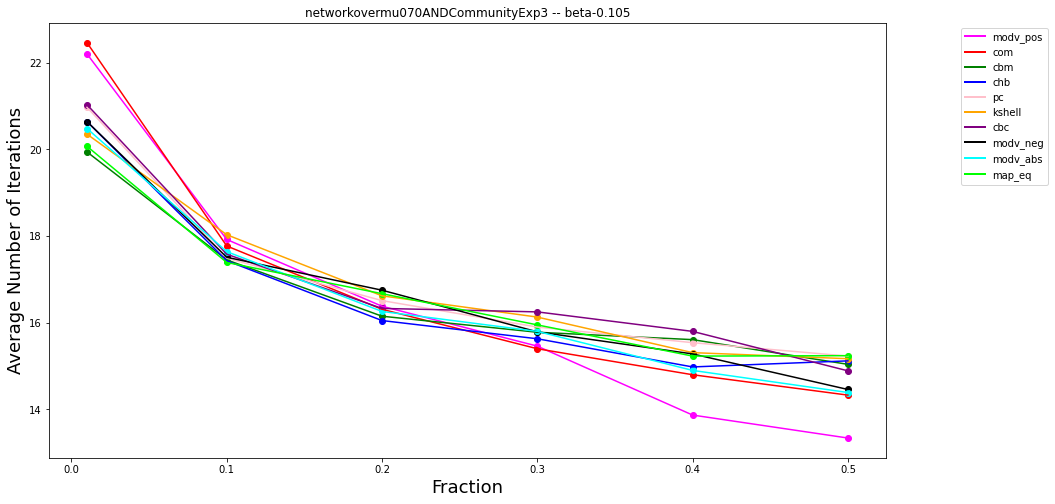

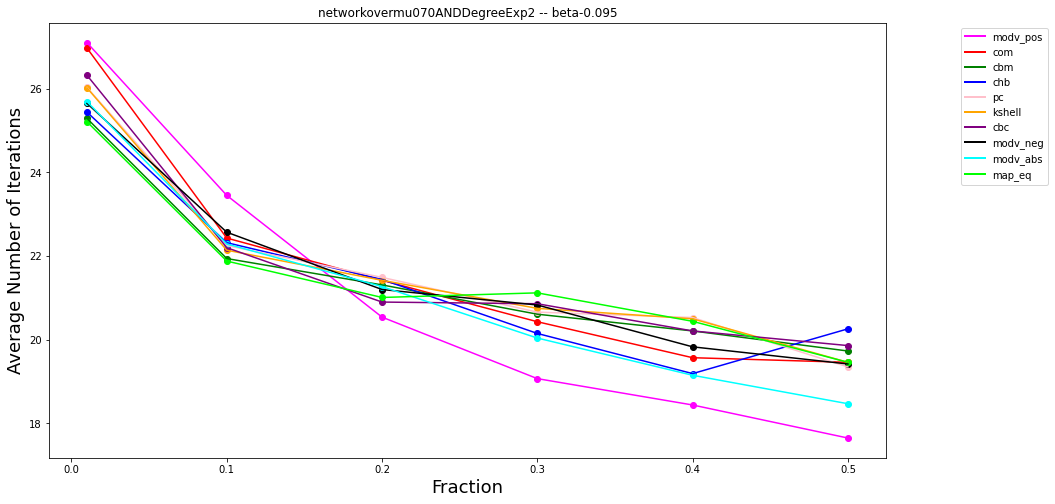

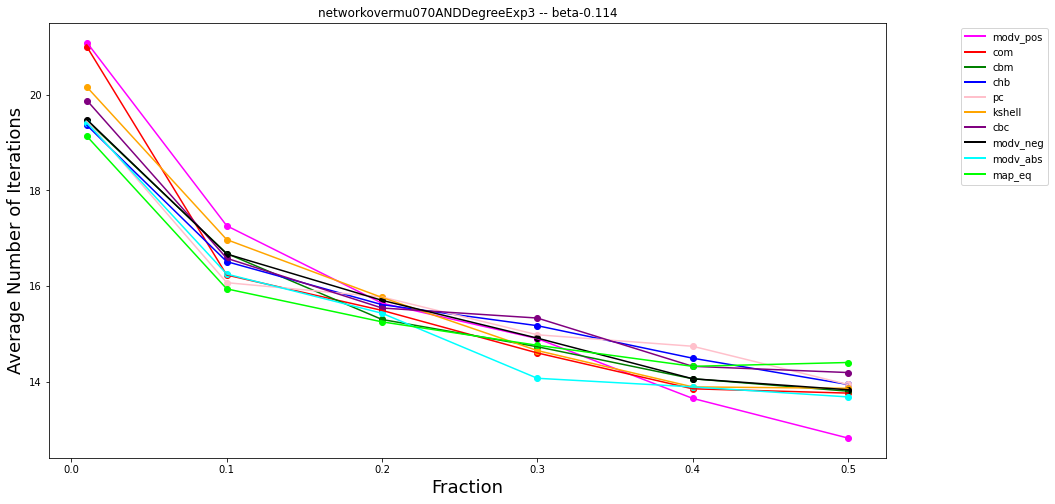

In [79]:
types = os.listdir(diffusionModelsPath)

for typo in types:
    if(typo=="ActivationSize"):
        #activationSizeCode(typo)
        pass
    else:
        if(typo=="Time"):
            #pass
            TimeCode(typo)
        else:
            if(typo=="DeltaR"):
                #deltaRCode(typo)
                pass
            